In [1]:
### AMSA PROJECT NYNKE
library(tibble)
library(ggplot2)
file_path <- 'amsa_data.csv'

# Read data from CSV file
df <- read.csv(file_path)

df$Pattern <- factor(df$Pattern, order=FALSE)

# Convert dataframe to tibble
df.tib <- as_tibble(df)

# Check the levels of the factor
print(levels(df$Pattern))

# Gather the data to long format for plotting
long_data <- tidyr::gather(df.tib, key = "Dimension", value = "Value", -Pattern)
long_data$Dimension <- factor(long_data$Dimension, order = FALSE)

[1] "cell-edge"    "extranuclear" "intranuclear" "pericellular" "perinuclear" 
[6] "random"      


In [ ]:
# Create density plots for each dimension
ggplot(long_data, aes(x = Value)) +
  geom_density(alpha = 0.5) +
  facet_wrap(~Dimension, scales = "free") +
  labs(title = "Density Plots for Each Dimension by Group",
       x = "Value", y = "Density") +
  theme_minimal()

## Boxplot

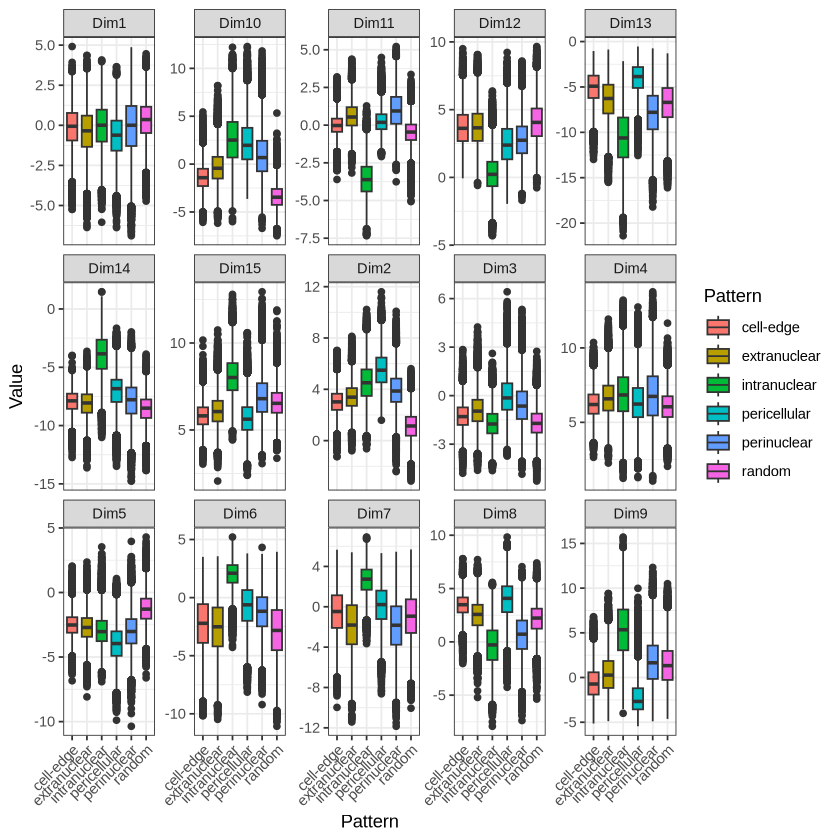

In [2]:
# Create a boxplot using ggplot2
ggplot(long_data, aes(x = Pattern, y = Value, fill = Pattern)) +
  geom_boxplot(position = "dodge", width = 0.7) +
  facet_wrap(~Dimension, scales = "free_y", nrow = 3, ncol = 5) +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


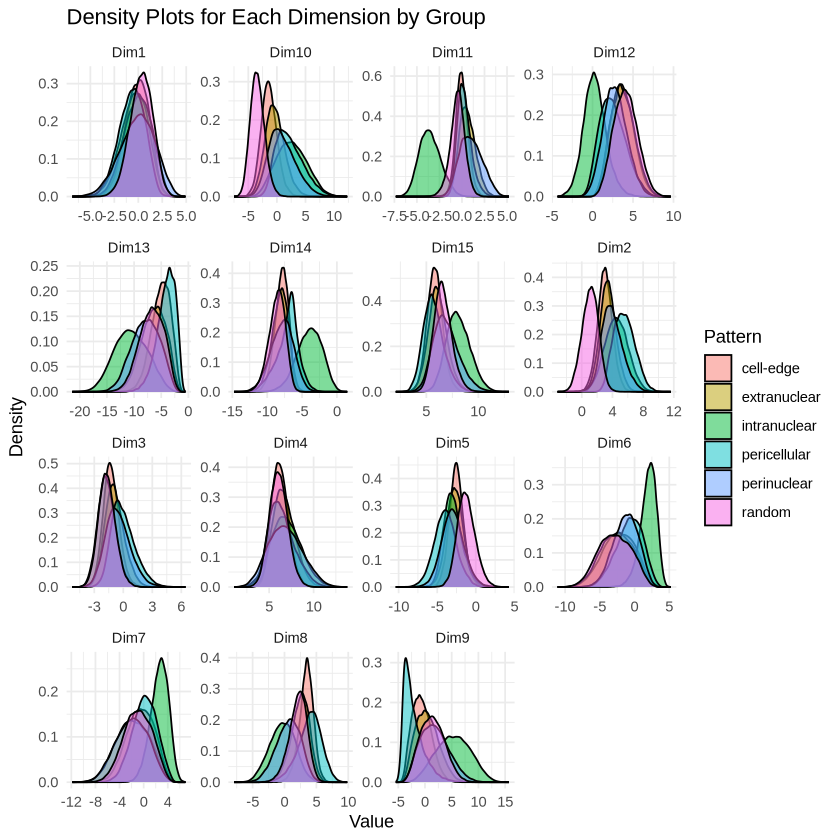

In [3]:
# Create density plots for each dimension
ggplot(long_data, aes(x = Value, fill = Pattern)) +
  geom_density(alpha = 0.5) +
  facet_wrap(~Dimension, scales = "free") +
  labs(title = "Density Plots for Each Dimension by Group",
       x = "Value", y = "Density") +
  theme_minimal()

## Correlation heatmap

In [3]:
# Get correlation matrix
library(reshape2)
cordim <- cor(df[,1:15]) #calculating the correlation of the variables

# Get upper triangle of the correlation matrix
get_upper_tri <- function(cordim){
  cordim[lower.tri(cordim)] <- NA
  return(cordim)
}

reorder_cordim <- function(cordim){
  # Use correlation between variables as distance
  dd <- as.dist((1-cordim)/2)
  hc <- hclust(dd)
  cordim <-cordim[hc$order, hc$order]
}

In [12]:
# Visualize correlation in heatmap between dimensions
upper_tri <- get_upper_tri(cordim)
upper_tri
melted_cordim <- melt(upper_tri, na.rm = TRUE)

ggheat_non_ordered <- ggplot(data = melted_cordim, aes(Var2, Var1, fill = value))+
  geom_tile(color = "white")+
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1,1), space = "Lab", 
                       name="Pearson\nCorrelation") +
  theme_minimal()+ 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   size = 12, hjust = 1))+
  coord_fixed()

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9,Dim10,Dim11,Dim12,Dim13,Dim14,Dim15
Dim1,1,-0.2763457,-0.3200279,-0.1257666,0.2644646,0.3540668,0.43159117,0.192442786,-0.107704870,-0.377308320,-0.19617743,-0.30975034,0.355953057,-0.05142669,-0.03529352
Dim2,NA,1.0000000,0.4181009,0.1543022,-0.6521025,0.3087187,0.07414021,-0.032194515,0.003089283,0.787250983,-0.07839187,-0.49956896,-0.051120854,0.34652131,-0.08497685
Dim3,NA,NA,1.0000000,0.3965496,-0.3864289,-0.2070057,-0.36595002,0.203054302,0.005328811,0.476587371,0.32357106,0.11627686,0.001822213,-0.19974079,-0.26334266
Dim4,NA,NA,NA,1.0000000,0.2021707,-0.2439248,-0.23306528,0.009309071,0.339456068,0.474630996,0.14534542,0.17983274,-0.268848258,0.02179532,0.09910937
Dim5,NA,NA,NA,NA,1.0000000,-0.3799815,-0.07269346,0.033508261,0.129652674,-0.442282590,0.02393793,0.32929724,-0.084913855,-0.31974546,0.26127683
Dim6,NA,NA,NA,NA,NA,1.0000000,0.78167460,-0.187235275,-0.123226164,0.217569312,-0.48426908,-0.73342929,0.149977084,0.67116874,0.20619812
Dim7,NA,NA,NA,NA,NA,NA,1.00000000,0.091033863,-0.204086689,0.005403242,-0.43647144,-0.59073057,0.338160759,0.54996159,0.15462000
Dim8,NA,NA,NA,NA,NA,NA,NA,1.000000000,-0.594320508,-0.113115082,0.36553581,0.21810538,0.754601026,-0.41310269,-0.54459155
Dim9,NA,NA,NA,NA,NA,NA,NA,NA,1.000000000,0.255203936,-0.44288890,-0.08130154,-0.885567609,0.12221758,0.51385096
Dim10,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.000000000,-0.07526750,-0.29132025,-0.327896730,0.37374020,0.17358131


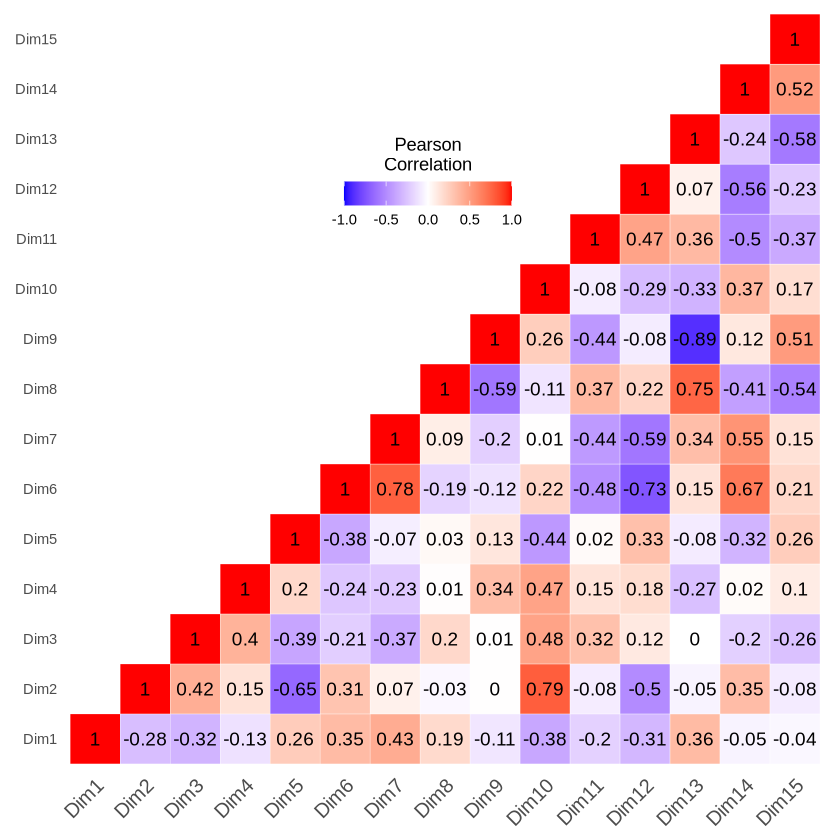

In [13]:
ggheat_non_ordered + 
geom_text(aes(Var2, Var1, label = round(value,2)), color = "black", size = 4) +
theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.grid.major = element_blank(),
  panel.border = element_blank(),
  panel.background = element_blank(),
  axis.ticks = element_blank(),
  legend.justification = c(1, 0),
  legend.position = c(0.6, 0.7),
  legend.direction = "horizontal")+
  guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
                title.position = "top", title.hjust = 0.5))

Conclusions so far: Definitely overlap in dimensions. For example dimension 13

## Check whether the dimensions are multivariate normally distributed

* Step 1: create a covariance matrix for the dimensions.
* Step 2: choose the algorithm. Given that we have less than 20 dimensions, we choose the Miwa algorithm.
* Step 3: Figure out which function to use from [mtvnorm](https://cran.r-project.org/web/packages/mvtnorm/mvtnorm.pdf), as most seem to be focused on creating new datasets rather than checking if your current dataset follows this distribution. 
    * Should be one of these:  pmvnorm, pmvt, qmvnorm, and qmvt

The MVN package has four/five different options to test the multivariate normality
1. Mardia’s multivariate normality test
2. Doornik-Hansen’s multivariate normality test
3. Energy multivariate normality test
4. Royston’s multivariate normality test
5. Henze-Zirkler’s multivariate normality test

all test the following hypothesis:
* H0: The variables follow a multivariate normal distribution
* H1: The variables do not follow a multivariate normal distribution

There doesn't seem to be one test that is preferred over another, so we will run all of them and take the majority vote as to whether our datset is multivariate normally distributed or not. 


In [4]:
# Testing for homogeneity of covariance matrices between the different clusters using the Box 's M test.
library(multiUS)
BoxMTest(df[,1:15],c=df$Pattern)

------------------------------------------------
      MBox    Chi-sqr          df            P
------------------------------------------------
932083.1669931920.1740         600       0.0000
------------------------------------------------
Covariance matrices are significantly different.


In [5]:
install.packages('MVN')
library(MVN)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘mnormt’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘nortest’, ‘moments’, ‘psych’, ‘energy’, ‘car’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [7]:
help MVN::mvn

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unexpected symbol
1: help MVN
         ^


In [8]:
data = df[,1:15]

ERROR: Error in df[, 1:15]: object of type 'closure' is not subsettable


In [10]:

#library(energy)

mvn(data = df[,1:15], mvnTest = "hz") # Henze-Zirkler's multivariate normality test

ERROR: Error: cannot allocate vector of size 362.9 Gb


In [ ]:
mvn(data = df[,1:15], mvnTest = "royston")#Royston's multivariate normality test

mvn(data = df[,1:15], mvnTest = "dh")#Doornik-Hansen's multivariate normality test

mvn(data = df[,1:15], mvnTest = "energy")# Energy multivariate normality test

mvn(data = df[,1:15], mvnTest = "mardia")#Mardia's multivariate

## MANOVA

In [ ]:

## Fit a MANOVA model: 
# Does the Pattern type significantly predict the combination of dimensions?
# And are there any potential differences between the different Patterns?
# Assumes independence between the dimensions, prolly not the case as dimensions can probably be reduced.
dimensions <- cbind(df$Dim1, df$Dim2, df$Dim3, df$Dim4, df$Dim5, df$Dim6, df$Dim7, df$Dim8, df$Dim9, df$Dim10, df$Dim11, df$Dim12, df$Dim13, df$Dim14, df$Dim15)
manova_model <- manova(dimensions ~ Pattern, data = df)

# MANOVA results are significant, good chance this is due to our high sample size.
summary(manova_model)

# Measuring the effect size the Pattern has over the combination of dimensions. Large effect size if >0.14
library(effectsize)
eta_squared(manova_model)



### Post hoc test

In [ ]:
## Post-hoc test --> Linear discriminant analysis
# Find a linear combination of features that best separates 2+ groups.  
library(MASS)
dependent <- cbind(df$Pattern)
dim_lda <- lda(dimensions, grouping=dependent, CV = FALSE)
dim_lda

lda_df <- data.frame(
  species = df[, "Pattern"],
  lda = predict(dim_lda)$x
)
colnames(lda_df) <- c("Pattern", "LD1", "LD2", "LD3", "LD4", "LD5")
lda_df



In [ ]:
# Visualize results
# Result visualization: intranuclear seems to be different from the rest. 
library(gridExtra)

# Create individual ggplot plots
plot1 <- ggplot(lda_df) +
  geom_point(aes(x = LD1, y = LD2, color = Pattern), size = 4) +
  theme_classic()

plot2 <- ggplot(lda_df) +
  geom_point(aes(x = LD1, y = LD3, color = Pattern), size = 4) +
  theme_classic()

plot3 <- ggplot(lda_df) +
  geom_point(aes(x = LD1, y = LD4, color = Pattern), size = 4) +
  theme_classic()

plot4 <- ggplot(lda_df) +
  geom_point(aes(x = LD1, y = LD5, color = Pattern), size = 4) +
  theme_classic()

plot5 <- ggplot(lda_df) +
  geom_point(aes(x = LD2, y = LD3, color = Pattern), size = 4) +
  theme_classic()

plot6 <- ggplot(lda_df) +
  geom_point(aes(x = LD2, y = LD4, color = Pattern), size = 4) +
  theme_classic()

plot7 <- ggplot(lda_df) +
  geom_point(aes(x = LD2, y = LD5, color = Pattern), size = 4) +
  theme_classic()

plot8 <- ggplot(lda_df) +
  geom_point(aes(x = LD3, y = LD4, color = Pattern), size = 4) +
  theme_classic()

plot9 <- ggplot(lda_df) +
  geom_point(aes(x = LD3, y = LD5, color = Pattern), size = 4) +
  theme_classic()

plot10 <- ggplot(lda_df) +
  geom_point(aes(x = LD4, y = LD5, color = Pattern), size = 4) +
  theme_classic()

# Arrange the plots in a 2x5 grid
grid.arrange(plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, plot9, plot10, ncol = 2)




## Multinomial logistic regression


## Multinomial logistic regression
library(nnet)

# Assuming df is your data frame
# Make sure df$Pattern is a factor with multiple levels

# Fit multinomial logistic regression model
model <- multinom(Pattern ~ Dim1 + Dim2 + Dim3 + Dim4 + Dim5 + Dim6 + Dim7 + Dim8 + Dim9 + Dim10 + Dim11 + Dim12 + Dim13 + Dim14 + Dim15, data = df)

# Summarize the results
summary(model)



In [ ]:


# Predict probabilities for each level of Pattern
predicted_probs <- predict(model, type = "probs")

# Combine predicted probabilities with the original data
df_with_probs <- cbind(df, predicted_probs)

# Reshape the data to long format for ggplot2
df_long <- tidyr::gather(df_with_probs, key = "Pattern_Level", value = "Probability", -Pattern)


In [ ]:

# Create a plot
ggplot(df_long, aes(x = Pattern_Level, y = Probability, fill = Pattern)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Predicted Probabilities for Multinomial Logistic Regression",
       x = "Pattern Level",
       y = "Probability") +
  theme_minimal()